In [1]:
from twoboxCol import *
import pickle
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import random_projection

import os
path = os.getcwd()

from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec



In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# pdf.fontype and ps.fontype must be set to 42 in order for text in exported figure to be editable in Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "CMU Serif"


In [3]:
"""
color code for color cues
"""
rgb = [[255, 0, 0],
       [255/4*3, 0, 255/4*1],
       [255/4*2, 0, 255/4*2],
       [255/4*1, 0, 255/4*3],
       [0, 0, 255]
      ] 
rgb=np.array(rgb)/255.

cmap_col5 = mpl.colors.ListedColormap(rgb,"")

In [4]:
# date of the files
datestring_data = '01262020(150900)'
datestring_train = '01262020(151953)'
datestring_NNagent='01262020(170602)'




In [5]:
idx = 2

In [6]:
"""
import IRC data (including trjectories and contour)
"""
dataN_pkl_file_IRC = open(path + '/Results/' + datestring_train + '_data' + datestring_data +  
                   '_agentNN' + datestring_NNagent + '_IRC'+ str(idx) +'_twoboxCol' + '.pkl', 'rb')
dataN_pkl_IRC = pickle.load(dataN_pkl_file_IRC)
dataN_pkl_file_IRC.close()

In [7]:
dataN_pkl_IRC.keys()

dict_keys(['Loglikelihood', 'Qaux1', 'Qaux2', 'Qaux3', 'Loglikelihood_original', 'uValue', 'uValuemesh', 'vValue', 'vValuemesh', 'point', 'point_add_gra', 'LL_add_gra', 'point_all', 'point_final', 'uniques', 'projectionMat', 'belief1_est', 'belief2_est', 'belief1_est_MAP', 'belief2_est_MAP', 'belief1_est_EXP', 'belief2_est_EXP', 'quan_true_bel1_POMDP', 'quan_true_bel2_POMDP', 'hes_final', 'var_para_woCol', 'std_para_woCol'])

In [8]:
point_final = dataN_pkl_IRC['point_final']
point = dataN_pkl_IRC['point']
point_add_gra = dataN_pkl_IRC['point_add_gra']
point_all = dataN_pkl_IRC['point_all']
uniques = dataN_pkl_IRC['uniques']
#LL_slice = dataN_pkl_IRC['LL_slice']
Loglikelihood = dataN_pkl_IRC['Loglikelihood']
Qaux1 = dataN_pkl_IRC['Qaux1']
Qaux2 = dataN_pkl_IRC['Qaux2']
Qaux3 = dataN_pkl_IRC['Qaux3']
Loglikelihood_original = dataN_pkl_IRC['Loglikelihood_original']
uValue = dataN_pkl_IRC['uValue']
uValuemesh = dataN_pkl_IRC['uValuemesh']
vValue = dataN_pkl_IRC['vValue']
vValuemesh = dataN_pkl_IRC['vValuemesh']
projectionMat = dataN_pkl_IRC['projectionMat']
belief1_est= dataN_pkl_IRC['belief1_est']
belief2_est = dataN_pkl_IRC['belief2_est']
belief1_est_MAP = dataN_pkl_IRC['belief1_est_MAP']
belief2_est_MAP = dataN_pkl_IRC['belief2_est_MAP']
belief1_est_EXP = dataN_pkl_IRC['belief1_est_EXP']
belief2_est_EXP = dataN_pkl_IRC['belief2_est_EXP']
quan_true_bel1 = dataN_pkl_IRC['quan_true_bel1_POMDP']
quan_true_bel2 = dataN_pkl_IRC['quan_true_bel2_POMDP']
hes_final = dataN_pkl_IRC['hes_final']
std_final = dataN_pkl_IRC['std_para_woCol']
var_para_woCol = dataN_pkl_IRC['var_para_woCol']
LL_add_gra = dataN_pkl_IRC['LL_add_gra']

In [9]:
"""
import parameters of the NN agent in the test case
"""

para_pkl_file = open(path + '/Results/'+ datestring_train +'_data'+ datestring_data+
                     '_agent' + datestring_NNagent + '_mainPara_twoboxCol.pkl', 'rb')
para_pkl = pickle.load(para_pkl_file)
para_pkl_file.close()
nq, na, nr, nl, Numcol, discount, parametersAgent, parametersExp = para_pkl['NNtest_params']
Numcol = parametersAgent[7]  # number of colors
Ncol = Numcol - 1  # number value: 0 top Numcol-10.99

In [84]:
"""
import  of the NN agent in the test case, where the bahevior data is used by the IRC 
"""
dataN_pkl_file1 = open(path + '/Results/'+ datestring_train + '_data' + datestring_data + 
                       '_agentNNdriven' + datestring_NNagent + '_twoboxCol.pkl', 'rb')
dataN_pkl1 = pickle.load(dataN_pkl_file1)
dataN_pkl_file1.close()

T = 20000
obs = dataN_pkl1['observations'][idx,:T, :5].astype(int) 
lat = dataN_pkl1['POMDP_agent'][idx, :T, 1:]
obs_IRC = dataN_pkl1['observations'][idx,:5000, :5].astype(int)   #NN agent behavior
lat_IRC = dataN_pkl1['POMDP_agent'][idx, :5000, 1:]  #POMDP agent beliefs, for comparison

act = obs[:, 0]
rew = obs[:, 1]
loc = obs[:, 2]
col1 = obs[:, 3]
col2 = obs[:, 4]

act_POMDP = dataN_pkl1['POMDP_agent'][idx, :T, 0]

In [303]:
len(np.where(obs_IRC[:, 0] == 0)[0])

2839

In [304]:
len(np.where(obs_IRC[:, 0] == 1)[0]) + len(np.where(obs_IRC[:, 0] == 2)[0]) + len(np.where(obs_IRC[:, 0] == 3)[0])  

1595

In [302]:
len(np.where(obs_IRC[:, 0] == 4)[0])

566

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


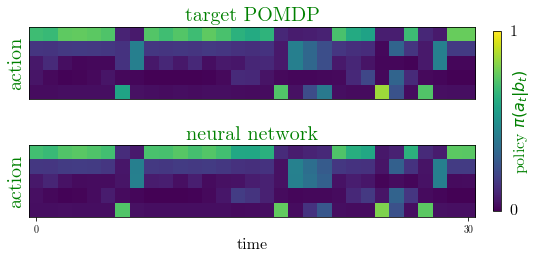

In [272]:
training_policy_show = list(np.arange(35,66))
fig_NNtraining, ax = plt.subplots(2,1,figsize=(8,4))

ax[0].imshow(dataN_pkl1['POMDP_agent_dist'][idx,training_policy_show, :na].T, vmin = 0, vmax = 1)
ax[0].set_ylabel('action',  fontsize = 20, color = 'green')
ax[0].set_title ( 'target POMDP', fontsize = 20, color = 'green')
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(dataN_pkl1['observations'][idx, training_policy_show, -na:].T, vmin = 0, vmax = 1)
ax[1].set_xlabel('time', fontsize = 16) 
ax[1].set_ylabel('action',  fontsize = 20, color = 'green')
ax[1].set_title ( 'neural network', fontsize = 20, color = 'green')
ax[1].set_xticks([0, 30])
ax[1].set_yticks([])

cbar_ax = fig_NNtraining.add_axes([0.93, 0.193, 0.015, 0.625])
cb = plt.colorbar(im, cax=cbar_ax)
for j, lab in enumerate(['0','1']):
    cb.ax.text(2.4, j , lab, ha='center', va='center', fontsize = 16)
cb.ax.get_yaxis().set_ticks([])
cb.ax.get_yaxis().labelpad = 10
cb.ax.set_ylabel('policy $\pi(a_t|b_t)$', rotation=90, fontsize = 16, color = 'green')


#plt.outline.set_visible(False)

fig_NNtraining.savefig('NNtraining.pdf', format='pdf', bbox_inches = 'tight')

In [12]:
# """
# Code to get the contour 
# """

# transformer = random_projection.GaussianRandomProjection(n_components = 2)
# transformer.fit_transform(point_all)
# projectionMatRand = transformer.components_

# # Contour of the likelihood
# step1 = 0.02   # for u (1st principle component)
# step2 = 0.02  # for v (2nd principle component)
# N1 = 15
# N2 = 15
# uOffset = - step1 * N1 / 2
# vOffset = - step2 * N2 / 2

# uValue = np.zeros(N1)
# vValue = np.zeros(N2)
# Qaux1 = np.zeros((N2, N1))    # Likelihood with ground truth latent
# Qaux2 = np.zeros((N2, N1))    # Expected complete data likelihood
# Qaux3 = np.zeros((N2, N1))    # Entropy of latent posterior
# para_slice = []

# for i in range(N1):
#     uValue[i] = step1 * (i) + uOffset
#     for j in range(N2):
#         vValue[j] = step2 * (j) + vOffset

#         para_slicePoints = point_final + uValue[i] * projectionMatRand[0] + vValue[j] * projectionMatRand[1]
#         para_slice.append(para_slicePoints)
#         para = np.copy(para_slicePoints)
#         #print(para)
        
#         twoboxCol = twoboxColMDP(discount, nq, nr, na, nl, para)
#         twoboxCol.setupMDP()
#         if np.any(twoboxCol.ThA<0) == True:
#             Qaux2[j, i] = np.nan
#             Qaux3[j, i] = np.nan
#         else:
#             twoboxCol.solveMDP_sfm()
#             ThA = twoboxCol.ThA
#             policy = twoboxCol.softpolicy
#             pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
#             Trans_hybrid_obs12 = twoboxCol.Trans_hybrid_obs12
#             Obs_emis_trans1 = twoboxCol.Obs_emis_trans1
#             Obs_emis_trans2 = twoboxCol.Obs_emis_trans2
#             twoboxColHMM = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)

#             #Qaux1[j, i] = twoboxHMM.likelihood(lat, obs, ThA, policy)  #given latent state
#             Qaux2[j, i] = twoboxColHMM.computeQaux(obs_IRC, ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2) 
#             Qaux3[j, i] = twoboxColHMM.latent_entr(obs_IRC) 

# Loglikelihood_original = Qaux2 + Qaux3
# Loglikelihood = np.nan_to_num(Loglikelihood_original, nan = np.nanmean(Loglikelihood))

In [13]:
# for i in range(Loglikelihood.shape[0]):
#     plt.plot(Loglikelihood[i, :])

In [14]:
# plt.plot(Loglikelihood[5, :])

In [15]:
# for i in range(Loglikelihood.shape[1]):
#     plt.plot(Loglikelihood[:, i])

In [16]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot_surface(vValue, uValue, Loglikelihood,
#                        linewidth=0)

In [104]:
parametersAgent

para = np.array(parametersAgent)
twoboxCol = twoboxColMDP(discount, nq, nr, na, nl, para)
twoboxCol.setupMDP()
twoboxCol.solveMDP_sfm()
ThA = twoboxCol.ThA
policy = twoboxCol.softpolicy
pi = np.ones(nq * nq) / nq / nq  # initialize the estimation of the belief state
Trans_hybrid_obs12 = twoboxCol.Trans_hybrid_obs12
Obs_emis_trans1 = twoboxCol.Obs_emis_trans1
Obs_emis_trans2 = twoboxCol.Obs_emis_trans2
twoboxColHMM = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, 4)

Qaux2= twoboxColHMM.computeQaux(obs_IRC, ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1,
                                       Obs_emis_trans2)
Qaux3 = twoboxColHMM.latent_entr(obs_IRC)
print(Qaux2 + Qaux3)

-5064.803166262865


In [18]:
point_all[-1]

array([0.21023327, 0.13528135, 0.09952121, 0.04401071, 0.21816186,
       0.16304653, 0.32053012, 5.        , 0.44215195, 0.5933881 ,
       0.11438321])

In [105]:
point_final
para = np.array(point_final)
twoboxCol = twoboxColMDP(discount, nq, nr, na, nl, para)
twoboxCol.setupMDP()
twoboxCol.solveMDP_sfm()
ThA = twoboxCol.ThA
policy = twoboxCol.softpolicy
pi = np.ones(nq * nq) / nq / nq  # initialize the estimation of the belief state
Trans_hybrid_obs12 = twoboxCol.Trans_hybrid_obs12
Obs_emis_trans1 = twoboxCol.Obs_emis_trans1
Obs_emis_trans2 = twoboxCol.Obs_emis_trans2
twoboxColHMM = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, 4)

Qaux2= twoboxColHMM.computeQaux(obs_IRC, ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1,
                                       Obs_emis_trans2)
Qaux3 = twoboxColHMM.latent_entr(obs_IRC)
print(Qaux2 + Qaux3)

-5030.003885952224


#### Contour

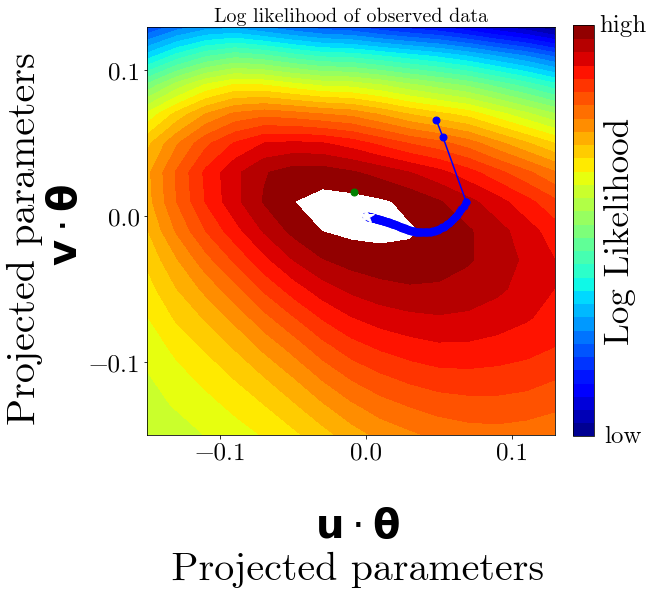

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [185]:
"""
figure for contour
"""
# project the trajectories onto the plane
point_2d = projectionMat.dot((point_all - point_all[-1]).T).T   

# true parameters projected onto the plane
true_2d = projectionMat.dot(parametersAgent - point_all[-1])

fig_contour, ax = plt.subplots(figsize = (8, 8))
uValuemesh, vValuemesh = np.meshgrid(uValue[:], vValue[:])
cs3 = plt.contourf(uValuemesh, vValuemesh, Loglikelihood[:, :], 
                  np.arange(np.min(Loglikelihood[:, :]), np.max(Loglikelihood[:, :]), 40), cmap='jet')
plt.xticks(np.arange(-1, 1, 0.1), fontsize = 25)
plt.yticks(np.arange(-1, 1, 0.1), fontsize = 25)

plt.plot(point_2d[:, 0], point_2d[:, 1], marker='.', color = 'b', markersize = 14)   # projected trajectories
plt.plot(point_2d[-1, 0], point_2d[-1, 1], marker='*', color = 'w', markersize = 16)        # final point
plt.plot(true_2d[0], true_2d[1], marker='.', color = 'g', markersize = 14)           # true
ax.set_aspect('equal')

ax.set_title('Log likelihood of observed data', fontsize = 20, fontname = 'CMU Serif')
plt.xlabel('\n $\mathbf{u} \cdot \mathbf{\\theta}$ \n Projected parameters', fontsize = 40, fontname = 'CMU Serif')
plt.ylabel('Projected parameters \n $\mathbf{v} \cdot \mathbf{\\theta}$', fontsize = 40, fontname = 'CMU Serif')
#plt.clabel(cs3, inline=1, fontsize=10)
cbar = plt.colorbar(cs3,fraction=0.046, pad=0.04)
for j, lab in enumerate(['low','high']):
    cbar.ax.text(2.4, j , lab, ha='center', va='center', fontsize = 25, fontname = 'CMU Serif')
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel('Log Likelihood', rotation=90, fontsize = 35, fontname = 'CMU Serif')

plt.show()

fig_contour.savefig('contour.pdf', format='pdf', bbox_inches = 'tight')

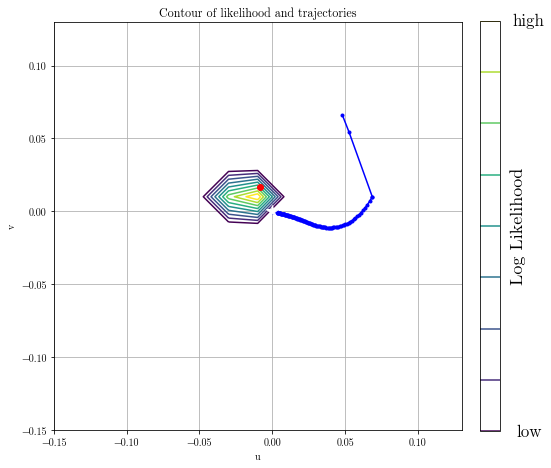

In [112]:
fig_contour, ax = plt.subplots(figsize = (8, 8))

prob_nor = np.exp(Loglikelihood - np.max(Loglikelihood))
uValuemesh1, vValuemesh1 = np.meshgrid(uValue[:], vValue[:])
cs_nor = plt.contour(uValuemesh1, vValuemesh1, prob_nor[:, :], 
                  np.arange(np.min(prob_nor[:,:]), np.max(prob_nor[:,:]), 0.1))

plt.plot(point_2d[:, 0], point_2d[:, 1], marker='.', color = 'b')   # projected trajectories
plt.plot(point_2d[-1, 0], point_2d[-1, 1], marker='*', color = 'w', markersize = 12)        # final point
plt.plot(true_2d[0], true_2d[1], marker='o', color = 'r')           # true
ax.set_aspect('equal')


#plt.xticks(np.arange(0, 1, 0.1))
#plt.yticks(np.arange(0, 1, 0.1))
ax.grid()
ax.set_title('Contour of likelihood and trajectories')
plt.xlabel('u')
plt.ylabel('v')
plt.clabel(cs3, inline=1, fontsize=10)
cbar = plt.colorbar(cs_nor,fraction=0.046, pad=0.04)
for j, lab in enumerate(['low','high']):
    cbar.ax.text(2.4, j , lab, ha='center', va='center', fontsize = 17, fontname = 'CMU Serif')
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel('Log Likelihood', rotation=90, fontsize = 18, fontname = 'CMU Serif')



plt.show()

In [22]:
parametersAgent


[0.17, 0.1, 0.1, 0.03, 0.2, 0.15, 0.3, 5, 0.45, 0.55, 0.1]

In [23]:
point_final

array([0.21023327, 0.13528135, 0.09952121, 0.04401071, 0.21816186,
       0.16304653, 0.32053012, 5.        , 0.44215195, 0.5933881 ,
       0.11438321])

In [24]:
LL_add_gra[-1]

-5030.003885952224

In [25]:
# para = np.copy(point_final)
# para[-2] = 0.6
# para[0] = 0.15
# twoboxCol = twoboxColMDP(discount, nq, nr, na, nl, para)
# twoboxCol.setupMDP()
# if np.any(twoboxCol.ThA<0) == True:
#     Qaux2[j, i] = np.nan
#     Qaux3[j, i] = np.nan
# else:
#     twoboxCol.solveMDP_sfm()
#     ThA = twoboxCol.ThA
#     policy = twoboxCol.softpolicy
#     pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
#     Trans_hybrid_obs12 = twoboxCol.Trans_hybrid_obs12
#     Obs_emis_trans1 = twoboxCol.Obs_emis_trans1
#     Obs_emis_trans2 = twoboxCol.Obs_emis_trans2
#     twoboxColHMM = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)

#     #Qaux1[j, i] = twoboxHMM.likelihood(lat, obs, ThA, policy)  #given latent state
# twoboxColHMM.computeQaux(obs_IRC, ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2) + twoboxColHMM.latent_entr(obs_IRC) 

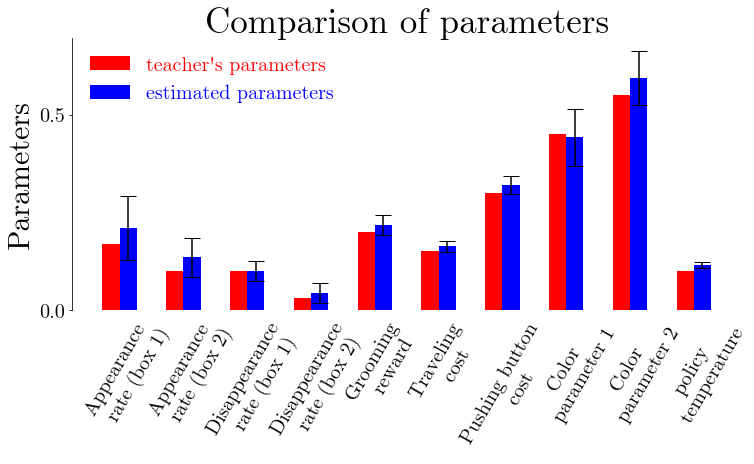

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [203]:
"""
Comparison of parameters
"""

N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig_parameters = plt.figure(figsize = (12, 5))
ax = fig_parameters.add_subplot(111)

zvals = parametersAgent[:7] + parametersAgent[8:]
yvals = point_final.tolist()[:7] + point_final.tolist()[8:]
rects1 = ax.bar(ind, zvals, width, color='r')
rects2 = ax.bar(ind+width, yvals, yerr=2*std_final, width = width, color = 'b', 
                align='center', alpha=1, ecolor='black', capsize=8)

ax.set_title('Comparison of parameters', fontsize = 35)
ax.set_ylabel('Parameters', fontsize = 30)
ax.set_yticks([0, 0.5])
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Appearance \n rate (box 1)', 'Appearance \n rate (box 2)', 'Disappearance \n rate (box 1)', 
                    'Disappearance \n rate (box 2)','Grooming \n reward', 'Traveling \n cost', 'Pushing button \n cost',
                    'Color \n parameter 1','Color \n parameter 2', 'policy \n temperature'), rotation=60, 
                   ha = 'center', fontsize = 20)
leg = ax.legend( (rects1[0], rects2[0]), ('teacher\'s parameters', 'estimated parameters' ), 
                fontsize = 20 , frameon=False)
leg_c = ['r', 'b']
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = leg_c[i])

ax.xaxis.set_tick_params(length = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

fig_parameters.savefig('parameters.pdf', format='pdf', bbox_inches = 'tight')

In [393]:
from numpy import savetxt
savetxt('hes_final.csv', hes_final, delimiter=',')

In [394]:
hes_final

array([[-5.60339686e+03, -2.19188223e+02,  2.16305125e+04,
        -8.80390871e+02,  1.63363438e+04,  1.32667992e+04,
         9.36506694e+03,  0.00000000e+00, -1.95177563e+03,
        -3.26508598e+03, -1.99042915e+04],
       [-2.19188223e+02, -2.09820428e+04,  4.22915036e+02,
         3.51064955e+04,  1.73995431e+04,  1.17124728e+04,
         9.96715244e+03,  0.00000000e+00, -7.03403202e+03,
        -1.35687515e+04, -1.96905603e+04],
       [ 2.16305125e+04,  4.22915036e+02, -1.11725967e+05,
         5.89716365e+03, -7.74753062e+04, -6.42739906e+04,
        -4.43678800e+04,  0.00000000e+00,  4.83942131e+03,
         1.78160917e+04,  7.24176061e+04],
       [-8.80390871e+02,  3.51064955e+04,  5.89716365e+03,
        -9.59707904e+04, -3.35621735e+04, -2.12185114e+04,
        -1.85436875e+04,  0.00000000e+00,  1.55923772e+04,
         2.78832886e+04,  1.52767825e+04],
       [ 1.63363438e+04,  1.73995431e+04, -7.74753062e+04,
        -3.35621735e+04, -8.58708518e+04, -6.65249900e+04,
  

In [27]:
selec_idx = list(range(7)) + list(range(8,11))

In [379]:
w, v = np.linalg.eig(hes_final[np.ix_(selec_idx, selec_idx)])
w[5], v[5]

(-238.13795963335627,
 array([ 0.3871717 , -0.10091111,  0.0580649 ,  0.83596232, -0.05933245,
         0.02137619, -0.0612954 ,  0.32554046, -0.08936283, -0.12654554]))

In [395]:
point_final

array([0.21023327, 0.13528135, 0.09952121, 0.04401071, 0.21816186,
       0.16304653, 0.32053012, 5.        , 0.44215195, 0.5933881 ,
       0.11438321])

In [389]:
point_final[selec_idx]

array([0.21023327, 0.13528135, 0.09952121, 0.04401071, 0.21816186,
       0.16304653, 0.32053012, 0.44215195, 0.5933881 , 0.11438321])

In [391]:
v[5]/np.sqrt(-w[5])/ point_final[selec_idx]

array([ 0.1193405 , -0.04833778,  0.037808  ,  1.23087508, -0.01762378,
        0.0084958 , -0.01239209,  0.04771106, -0.00975897, -0.07169192])

In [385]:
std_final

array([0.04047267, 0.02484563, 0.01238955, 0.01303729, 0.01279313,
       0.0070596 , 0.01158708, 0.0363209 , 0.03438527, 0.00392591])

In [384]:
std_final / np.linalg.norm(std_final)

array([0.54855598, 0.33675116, 0.16792478, 0.17670396, 0.17339475,
       0.09568401, 0.15704832, 0.492284  , 0.46604903, 0.05321076])

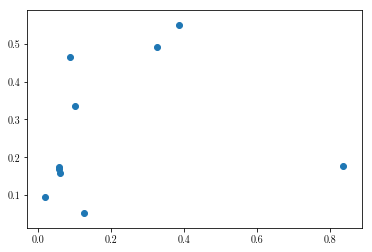

In [387]:
plt.scatter(np.abs(v[5]), std_final / np.linalg.norm(std_final))
#plt.set_aspect()

In [149]:
w_sort = np.sort(w)
w_sort / np.min(w_sort)

array([1.00000000e+00, 2.76605331e-01, 2.30845817e-01, 6.75709490e-02,
       3.61636807e-02, 1.82156971e-02, 1.47982809e-02, 9.68559048e-03,
       2.81882302e-03, 4.68944321e-04])

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


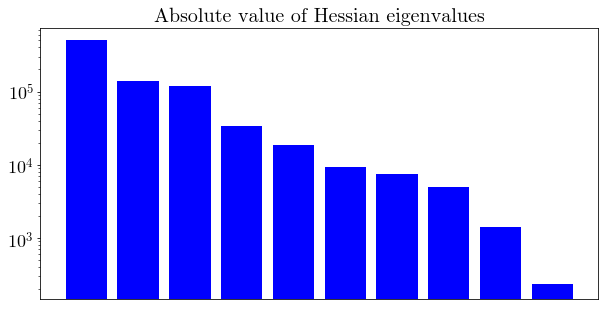

In [383]:
fig_eig = plt.figure(figsize = (10, 5))
ax = fig_eig.add_subplot(111)

plt.yscale('log')
ax.bar(np.arange(N), -w_sort, color = 'blue')
ax.set_xticks([])
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 


plt.title('Absolute value of Hessian eigenvalues', fontsIZE = 20)
fig_eig.savefig('eigenSpectrum.pdf', format='pdf', bbox_inches = 'tight')

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


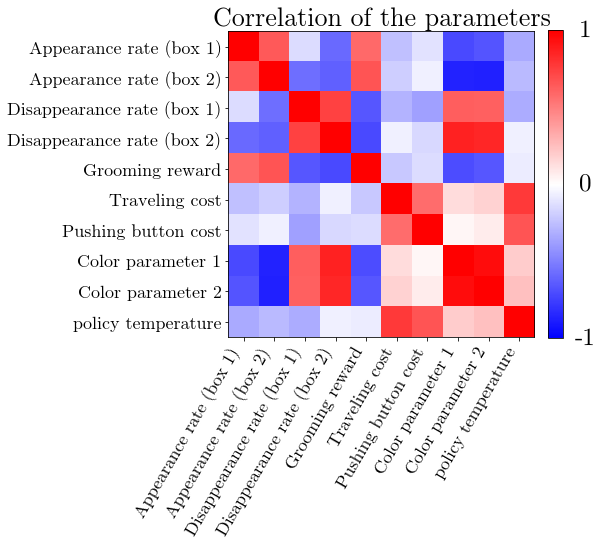

In [293]:
fig_correlation, ax = plt.subplots(figsize = (6, 6))
correlation_mat = np.linalg.inv(np.diag(std_final)).dot(var_para_woCol).dot(np.linalg.inv(np.diag(std_final)))
p_corre = ax.imshow(correlation_mat, 
                    cmap = 'bwr', vmax = np.max(np.abs(correlation_mat)), vmin = - np.max(np.abs(correlation_mat)))
ax.set_title('Correlation of the parameters', fontsize = 26)
ax.set_xticks(list(range(10)))
ax.set_xticklabels( ('Appearance rate (box 1)', 'Appearance rate (box 2)', 'Disappearance rate (box 1)', 
                    'Disappearance rate (box 2)','Grooming reward', 'Traveling cost', 'Pushing button cost',
                    'Color parameter 1','Color parameter 2', 'policy temperature'), rotation = 60, 
                   ha = 'right', fontsize = 18)
ax.set_yticks(list(range(10)))
ax.set_yticklabels( ('Appearance rate (box 1)', 'Appearance rate (box 2)', 'Disappearance rate (box 1)', 
                    'Disappearance rate (box 2)','Grooming reward', 'Traveling cost', 'Pushing button cost',
                    'Color parameter 1','Color parameter 2', 'policy temperature'), ha = 'right', fontsize = 18)
cbar = fig_correlation.colorbar(p_corre,fraction=0.046, pad=0.04)
for j, lab in enumerate(['-1','0', '1']):
    cbar.ax.text(2.4, j/2 , lab, ha='center', va='center', fontsize = 25, fontname = 'CMU Serif')
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_yaxis().labelpad = 10

fig_correlation.savefig('correlation.pdf', format='pdf', bbox_inches = 'tight')




'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


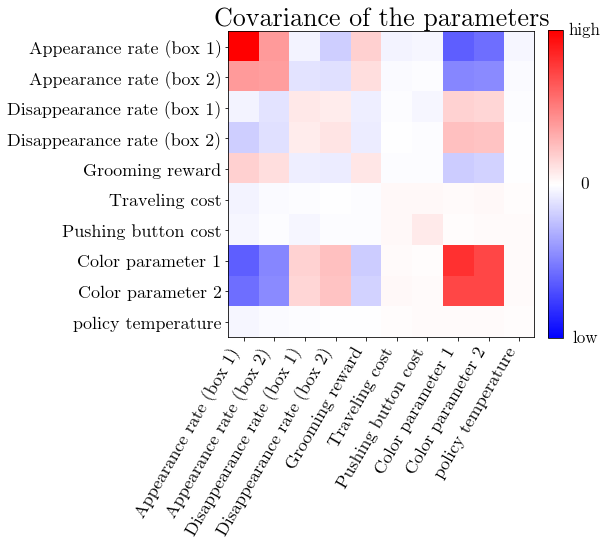

In [292]:
fig_cov, ax = plt.subplots(figsize = (6, 6))
p_cov = ax.imshow(var_para_woCol, cmap = 'bwr', 
             vmin = -np.max(var_para_woCol), vmax = np.max(var_para_woCol))
ax.set_title('Covariance of the parameters', fontsize = 26)
ax.set_xticks(list(range(10)))
ax.set_xticklabels( ('Appearance rate (box 1)', 'Appearance rate (box 2)', 'Disappearance rate (box 1)', 
                    'Disappearance rate (box 2)','Grooming reward', 'Traveling cost', 'Pushing button cost',
                    'Color parameter 1','Color parameter 2', 'policy temperature'), rotation = 60, 
                   ha = 'right', fontsize = 18)
ax.set_yticks(list(range(10)))
ax.set_yticklabels( ('Appearance rate (box 1)', 'Appearance rate (box 2)', 'Disappearance rate (box 1)', 
                    'Disappearance rate (box 2)','Grooming reward', 'Traveling cost', 'Pushing button cost',
                    'Color parameter 1','Color parameter 2', 'policy temperature'), ha = 'right', fontsize = 18)

cbar = fig_cov.colorbar(p_cov,fraction=0.046, pad=0.04)
for j, lab in enumerate(['low','0', 'high']):
    cbar.ax.text(2.4, j/2 , lab, ha='center', va='center', fontsize = 17, fontname = 'CMU Serif')
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_yaxis().labelpad = 10

fig_cov.savefig('covariance.pdf', format='pdf', bbox_inches = 'tight')


# Based on estimated parameters

In [31]:
belief_array = (np.arange(nq) + 1/2)/nq
belief_array

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [32]:
# """
# beliefs of the POMDP agent
# """
# # quan_true_bel1 = find_closest_array(belief_array, lat[:, 0])
# # quan_true_bel2 = find_closest_array(belief_array, lat[:, 1])
# quan_true_bel1 = (lat[:, 0] + 1/2)/nq
# quan_true_bel2 = (lat[:, 1] + 1/2)/nq

In [33]:
para_est = np.copy(point_final)
twoboxCol_est = twoboxColMDP(discount, nq, nr, na, nl, para_est)
twoboxCol_est.setupMDP()
twoboxCol_est.solveMDP_sfm()
ThA = twoboxCol_est.ThA
policy = twoboxCol_est.softpolicy

In [34]:
# pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
# Trans_hybrid_obs12 = twoboxCol_est.Trans_hybrid_obs12
# Obs_emis_trans1 = twoboxCol_est.Obs_emis_trans1
# Obs_emis_trans2 = twoboxCol_est.Obs_emis_trans2
# twoboxColHMM_est = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)

# twoboxColHMM_est.computeQaux(obs, ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2)+ \
# twoboxColHMM_est.latent_entr(obs)

In [35]:
# alpha_est, scale_est = twoboxColHMM_est.forward_scale(obs)
# beta_est = twoboxColHMM_est.backward_scale(obs, scale_est)
# gamma_est = twoboxColHMM_est.compute_gamma(alpha_est, beta_est)
# xi_est = twoboxColHMM_est.compute_xi(alpha_est, beta_est, obs)

In [36]:
# belief1_est = np.sum(np.reshape(gamma_est[:, :].T, (gamma_est.shape[-1], nq, nq)), axis = 2)
# belief2_est = np.sum(np.reshape(gamma_est[:, :].T,(gamma_est.shape[-1], nq, nq)), axis = 1)

In [37]:
# belief1_est_MAP = (np.argmax(belief1_est, axis = 1) + 0.5)/nq
# belief2_est_MAP = (np.argmax(belief2_est, axis = 1) + 0.5)/nq

# belief1_est_EXP = belief1_est.dot(belief_array)
# belief2_est_EXP = belief2_est.dot(belief_array)

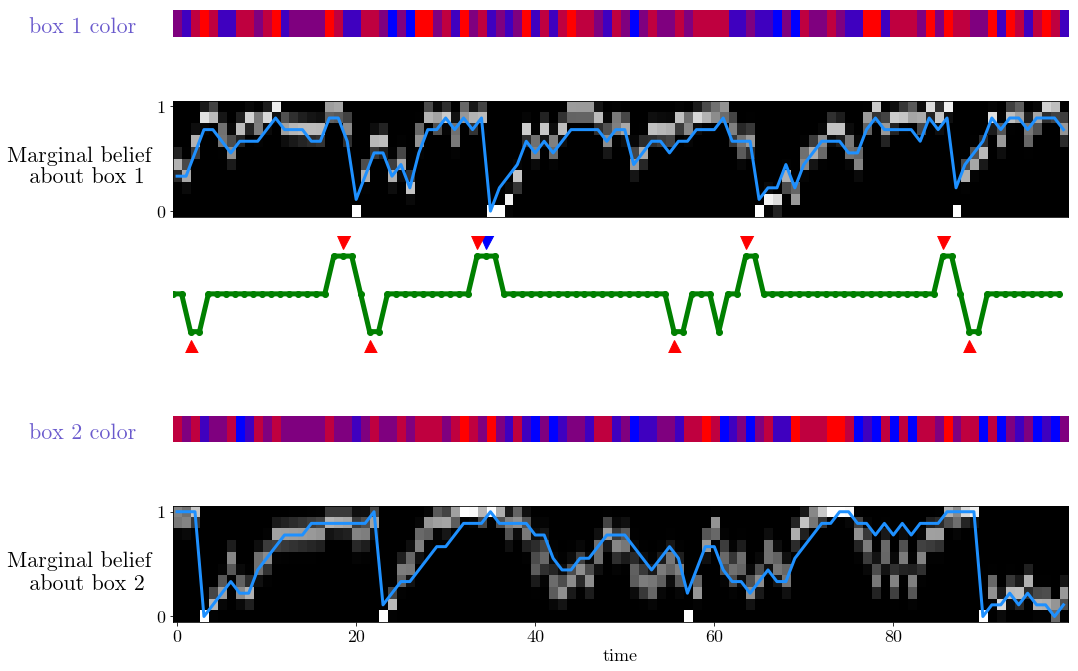

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [228]:
#fig_posterior = plt.figure(figsize= (15, 10))
showlen = 100
startT = 440 

endT = startT + showlen
showT = range(startT,endT)

fig_posterior, [ax3, ax1, ax_loc, ax4, ax2] = plt.subplots(5, 1, figsize= (15, 10))
#plt.figure(figsize = (15,10))
#gs1 = gridspec.GridSpec(5, 1, height_ratios=[3, 3, 3, 1, 3])
#gs1.update(wspace=0.025, hspace=0) # set the spacing between axes. 

#ax3 = plt.subplot(gs1[0])
#ax3 = fig_posterior.add_subplot(511)
ax3.imshow(np.tile(col1[showT], (3,1)), cmap = cmap_col5,vmin=0, vmax=Ncol)
ax3.yaxis.set_label_coords(-0.1,0)
ax3.set_ylabel('box 1 color', color = 'slateblue', rotation= 360, fontsize = 22)
#ax3.xaxis.set_tick_params(length = 0)
#ax3.set_xlim([0, showlen])
ax3.set_xticks([])
ax3.set_yticks([])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)



#ax1 = plt.subplot(gs1[1])
#ax1 = fig_posterior.add_subplot(512)
ax1.imshow(belief1_est[showT].T, interpolation='Nearest', cmap='gray', origin='lower', aspect='auto')
ax1.plot(lat[showT, 0], color = 'dodgerblue', markersize = 10,linewidth=3.0)
#ax1.set(title = 'belief of box 1 based on estimated parameters')
#ax1.get_yaxis().labelpad = 70
ax1.yaxis.set_label_coords(-0.1,0.25)
ax1.set_ylabel('Marginal belief \n about box 1', rotation= 360, fontsize = 22)
#ax1.set_xlim([0, showlen])
ax1.set_xticks([])
ax1.set_yticks([0, nq-1])
ax1.set_yticklabels(['0','1'])
ax1.tick_params(axis='both', which='major', labelsize=18)



#ax_loc = plt.subplot(gs1[2])
#ax_loc = fig_posterior.add_subplot(513)
ax_loc.plot((np.remainder(loc[showT]+1, 3) - 1 ) * 10, 'g.-', markersize = 12, linewidth = 5)
#ax_loc.plot((np.remainder(loc[showT]+1, 3) - 1 ) * 10, 'm-')
# ax_loc.plot(act[showT] // 4 * 10 * (np.abs(loc[showT]* 2 - 1.5) - 0.5 - 1), 
#              'v', markersize = 5)
# ax_loc.plot(rew[showT] * 9, 'c*')
box1_r = act[showT] // 4 * 7 * np.remainder(loc[showT]+1, 3) * np.insert(rew[showT][1:], -1, 0) * 1.0 
box2_r = act[showT] // 4 * 7 * (np.remainder(loc[showT]+1, 3) - 2) * np.insert(rew[showT][1:], -1, 0) * 1.0
box1_n = act[showT] // 4 * 7 * np.remainder(loc[showT]+1, 3) * (1-np.insert(rew[showT][1:], -1, 0))* 1.0 * (loc[showT] != 0)
box2_n = act[showT] // 4 * 7 * ((np.remainder(loc[showT]+1, 3) - 2) * (1-np.insert(rew[showT][1:], -1, 0)))* 1.0 * (loc[showT] != 0)
box1_r[ box1_r==0 ] = np.nan
box2_n[ box2_n==0 ] = np.nan
box2_r[ box2_r==0 ] = np.nan
box1_n[ box1_n==0 ] = np.nan
ax_loc.plot(box2_r, '^', c = 'red', markersize = 15)
ax_loc.plot(box1_n, 'v', c = 'blue', markersize = 15)
ax_loc.plot(box2_n, '^', c = 'blue', markersize = 15)
ax_loc.plot(box1_r, 'v', c = 'red', markersize = 15)

ax_loc.set_xlim([0,showlen])
ax_loc.spines['top'].set_visible(False)
ax_loc.spines['right'].set_visible(False)
ax_loc.spines['bottom'].set_visible(False)
ax_loc.spines['left'].set_visible(False)
#ax_loc.set_ylim([1,16])
ax_loc.set_yticks([])
ax_loc.set_xticks([])



#ax2 = plt.subplot(gs1[4])
#ax2 = fig_posterior.add_subplot(515)
ax2.imshow(belief2_est[showT].T, interpolation='Nearest', cmap='gray', origin='lower',aspect='auto')
ax2.plot(lat[showT, 1], color = 'dodgerblue', markersize = 10,linewidth=3.0)
#ax2.set(title = 'belief of box 2 based on estimated parameters')
ax2.set_xlabel('time', fontsize = 18)
#ax2.get_yaxis().labelpad = 70
ax2.yaxis.set_label_coords(-0.1,0.25)
ax2.set_ylabel('Marginal belief \n about box 2', rotation= 360, fontsize = 22)
#ax2.set_xticks([])
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_yticks([0, nq-1])
ax2.set_yticklabels(['0','1'])


#ax4 = plt.subplot(gs1[3])
#ax4 = fig_posterior.add_subplot(514)
ax4.imshow(np.tile(col2[showT], (3,1)), cmap = cmap_col5,vmin=0, vmax=Ncol)
#ax4.get_yaxis().labelpad = 70
ax4.yaxis.set_label_coords(-0.1,0)
ax4.set_ylabel('box 2 color', color = 'slateblue', rotation= 360, fontsize = 22)
ax4.set_xticks([])
ax4.set_yticks([])
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


fig_posterior.savefig('posterior.pdf', format='pdf', bbox_inches = 'tight')

In [40]:
mutual1 = np.zeros((nq,nq))
for i in range(nq):
    index = np.where(lat[:, 0]==i)
    #mutual1[i] = np.sum(belief1_allest.T[:, index[0].tolist()], axis = 1)/np.size(index)
    mutual1[:, i] = np.sum(belief1_est.T[:, index[0].tolist()], axis = 1) /np.size(index)
    mutual1[:, i] = mutual1[:, i] / np.sum(mutual1[:, i] )

mutual2 = np.zeros((nq,nq))
for i in range(nq):
    index = np.where(lat[:, 1]==i)
    mutual2[:, i] = np.sum(belief2_est.T[:, index[0].tolist()], axis = 1) /np.size(index)
    mutual2[:, i] = mutual2[:, i] / np.sum(mutual2[:, i] )


'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


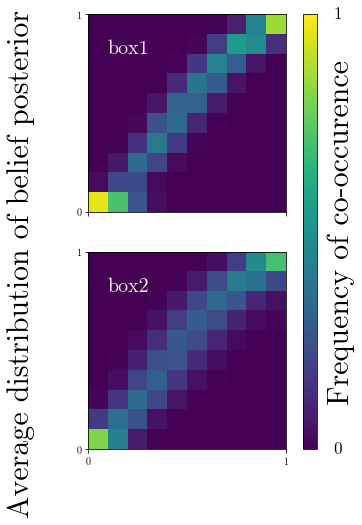

In [242]:
fig_beliefdist, ax = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig_beliefdist.text(0.1, 0.85, 'Average distribution of belief posterior',
                    fontsize = 30, rotation = 90)

ax[0].imshow(mutual1, origin='lower', extent=[0,1,0,1], vmin=0, vmax=1)
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))        
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#ax[0].set_xticks([0, 1])
ax[0].set_yticks([0, 1])
ax[0].text(.1, .8, 'box1',  color = 'white', fontsize = 20.0,
        bbox={'facecolor': 'none', 'alpha': 0, 'pad': 8})

im = ax[1].imshow(mutual2, origin='lower', extent=[0,1,0,1], vmin=0, vmax=1)
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))        
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax[1].set_xticks([0, 1])
ax[1].set_yticks([0, 1])
ax[1].text(.1, .8, 'box2',  color = 'white', fontsize = 20.0,
        bbox={'facecolor': 'none', 'alpha': 0, 'pad': 8})



cbar = fig_beliefdist.colorbar(im, ax=ax.ravel().tolist(), shrink=1, aspect=30)
for j, lab in enumerate(['0','1']):
    cbar.ax.text(2.4, j , lab, ha='center', va='center', fontsize = 17, fontname = 'CMU Serif')
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel('Frequency of co-occurence', rotation=90, fontsize = 30, fontname = 'CMU Serif')


fig_beliefdist.savefig('belief_conditionaldist.pdf', format='pdf', bbox_inches = 'tight')


### testing for other parameters

In [42]:
# delta_para = np.array(parametersAgent)  - point[-1]

# para_test = np.array(parametersAgent) + 1 * (delta_para)
# para_test = np.copy(para_test)
# twoboxCol_test = twoboxColMDP(discount, nq, nr, na, nl, para_test)
# twoboxCol_test.setupMDP()
# twoboxCol_test.solveMDP_sfm()
# ThA = twoboxCol_test.ThA
# policy_test = twoboxCol_test.softpolicy
# pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
# Trans_hybrid_obs12 = twoboxCol_test.Trans_hybrid_obs12
# Obs_emis_trans1 = twoboxCol_test.Obs_emis_trans1
# Obs_emis_trans2 = twoboxCol_test.Obs_emis_trans2

In [43]:
# fig, ax = plt.subplots(2,1, figsize= (20, 4))
# #ax[0] = fig.add_subplot(211)
# ax[0].imshow(policy[:, 400:], interpolation='Nearest', vmin = 0, vmax = 1)
# ax[0].set_ylabel('policy with IRC parameter')
# ax[1].imshow(policy_test[:, 400:], interpolation='Nearest', vmin = 0, vmax = 1)
# ax[1].set_ylabel('policy with test  parameter')


In [44]:
# plt.scatter(policy.reshape(-1,1), policy_test.reshape(-1,1))
# plt.show()

In [45]:
# twoboxColHMM_test = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)

# alpha_test, scale_test = twoboxColHMM_test.forward_scale(obs)
# beta_test = twoboxColHMM_test.backward_scale(obs, scale_test)
# gamma_test = twoboxColHMM_test.compute_gamma(alpha_test, beta_test)
# xi_test = twoboxColHMM_test.compute_xi(alpha_test, beta_test, obs)

# belief1_test = np.sum(np.reshape(gamma_test[:, :].T, (T, nq, nq)), axis = 2)
# belief2_test = np.sum(np.reshape(gamma_test[:, :].T, (T, nq, nq)), axis = 1)
# #print(belief1_test[:10, 0])

# belief1_test_EXP = belief1_test.dot(belief_array)
# belief2_test_EXP = belief2_test.dot(belief_array)

In [46]:
# fig_posterior = plt.figure(figsize= (15, 12))
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# ax1 = fig_posterior.add_subplot(111)
# ax1.imshow(belief1_test[showT].T, interpolation='Nearest', cmap='gray', origin='lower')
# ax1.plot(lat[showT, 0], color = 'r',marker ='.', markersize = 15)
# ax1.set(title = 'belief of box 1 based on estimated parameters')
# ax1.set_xlim([0,endT])

# Neural coding

In [47]:
from pandas import DataFrame, read_csv


bbelief = np.dstack([dataN_pkl_IRC['belief1_est_MAP'], dataN_pkl_IRC['belief2_est_MAP']])
bb = bbelief.reshape(-1, 2)

bb_df = DataFrame(bb, columns=['behavior_belief1', 'behavior_belief2'])
bb_df.to_csv(path_or_buf='./data/bb_df.csv', index=False)

# policy_df = DataFrame(NNpolicy_IRC.T, columns=['NN_IRC_p1', 'NN_IRC_p2', 'NN_IRC_p3', 'NN_IRC_p4', 'NN_IRC_p5'])
# policy_df.to_csv(path_or_buf='./data/policy_df.csv', index=False)


r = dataN_pkl1['neural_response'][idx, :T, :]
r_df = DataFrame(r)  # no colurmn name
r_df.to_csv(path_or_buf='./data/r_df.csv', index=False)

In [48]:
#!python data_preprocessing.py

In [49]:
from data_preprocessing_notebook import *
data_preprocessing_notebook(idx,datestring_train,
                            datestring_data,
                            datestring_NNagent)

data preprocessing is successfully done!


# check std of beliefs

In [50]:
# bel1_std = np.sum(np.multiply(np.square(np.tile(belief_array, (T,1)).T - np.tile(belief1_est_EXP, (nq,1))), 
#                    belief1_est.T), axis = 0)
# plt.scatter(quan_true_bel1, bel1_std)

In [51]:
# para_check_set = rmv_dup_arrary(point)
# bel_std_set = np.zeros((2,len(para_check_set), T))
# bel_MAP_set = np.zeros((2,len(para_check_set), T))

# for i, para_test in enumerate(para_check_set):
#     para_test = np.copy(para_test)
#     twoboxCol_test = twoboxColMDP(discount, nq, nr, na, nl, para_test)
#     twoboxCol_test.setupMDP()
#     twoboxCol_test.solveMDP_sfm()
#     ThA = twoboxCol_test.ThA
#     policy = twoboxCol_test.softpolicy
#     pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
#     Trans_hybrid_obs12 = twoboxCol_test.Trans_hybrid_obs12
#     Obs_emis_trans1 = twoboxCol_test.Obs_emis_trans1
#     Obs_emis_trans2 = twoboxCol_test.Obs_emis_trans2
#     twoboxColHMM_test = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)
    
#     alpha_test, scale_test = twoboxColHMM_test.forward_scale(obs)
#     beta_test = twoboxColHMM_test.backward_scale(obs, scale_test)
#     gamma_test = twoboxColHMM_test.compute_gamma(alpha_test, beta_test)
#     xi_test = twoboxColHMM_test.compute_xi(alpha_test, beta_test, obs)
    
#     belief1_test = np.sum(np.reshape(gamma_test[:, :].T, (T, nq, nq)), axis = 2)
#     belief2_test = np.sum(np.reshape(gamma_test[:, :].T, (T, nq, nq)), axis = 1)
#     #print(belief1_test[:10, 0])
    
#     belief1_test_EXP = belief1_test.dot(belief_array)
#     belief2_test_EXP = belief2_test.dot(belief_array)
    
#     bel_MAP_set[0,i,:] = (np.argmax(belief1_test, axis = 1) + 0.5)/nq
#     bel_MAP_set[1,i,:] = (np.argmax(belief2_test, axis = 1) + 0.5)/nq


    
#     bel_std_set[0, i, :] = np.sum(np.multiply(np.square(np.tile(belief_array, (T,1)).T - np.tile(belief1_test_EXP, (nq,1))), 
#                    belief1_test.T), axis = 0)
#     bel_std_set[1, i, :] = np.sum(np.multiply(np.square(np.tile(belief_array, (T,1)).T - np.tile(belief1_test_EXP, (nq,1))), 
#                    belief1_test.T), axis = 0)
    

In [52]:
# plt.figure(figsize=(5.15, 5.15))
# plt.clf()
# plt.subplot(111)
# for i in range(len(uniques)):
#     plt.scatter(quan_true_bel1, bel_std_set[0, 1])
# plt.xlabel('POMDP belief')
# plt.ylabel('std')

In [53]:
# plt.figure(figsize=(5.15, 5.15))
# plt.clf()
# plt.subplot(111)
# for i in range(len(uniques)):
#     plt.scatter(bel_MAP_set[0,i], bel_std_set[0, i])
# plt.xlabel('MAP belief')
# plt.ylabel('std')

# Calculate Hessian

In [54]:
# L =len(parametersAgent)
# hes = np.zeros((L,L))

# paraHessian = point[-1]
# twoboxd = twoboxColMDP_der(discount, nq, nr, na, nl, paraHessian)
# twoboxd1st = twoboxd.dloglikelihhod_dpara_sim(obs)

In [55]:
# perturb = 10** -6
# for i in range(L):
#     if i != 7:
#         para_perb = np.copy(paraHessian)
#         para_perb[i] += perturb

#         twoboxd_perb = twoboxColMDP_der(discount, nq, nr, na, nl, para_perb)       
#         twoboxd1st_pert = twoboxd_perb.dloglikelihhod_dpara_sim(obs)

#         hes[i, :] = (twoboxd1st_pert - twoboxd1st) / perturb

In [56]:
# w, v = np.linalg.eig(hes)
# w, v

## behavioral statistics

In [57]:
from POMDP_generate import *

In [58]:
obsN_est, latN_est, truthN_est, _ = twoboxColGenerate(point_final, 
                                                      parametersExp, sample_length = T, sample_number = 1, nq = 5)


Set the parameters of the model... 

Generating data...
Data stored in files


In [59]:
obs_est = obsN_est[0]
lat_est = latN_est[0]

act_est = obs_est[:, 0]
rew_est = obs_est[:, 1]
loc_est = obs_est[:, 2]
col1_est = obs_est[:, 3]
col2_est = obs_est[:, 4]

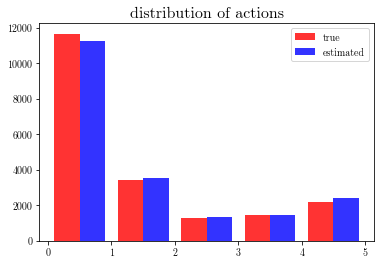

In [60]:
# # histogram of actions
# fig1, ax = plt.subplots()
# plt.title('distribution of actions', fontsize = 16)
# plt.hist([np.squeeze(act), np.squeeze(act_est)], bins = [0,1,2,3,4,5], 
#          color = ['red','blue'], label = ['true', 'estimated'], alpha = 0.8)
# plt.legend()
# #ax[1].hist(np.squeeze(action), bins = 5, normed=False, weights=weights)
# plt.show()

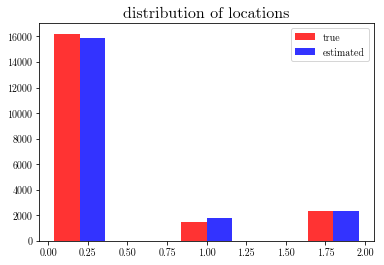

In [61]:
# # histogram of locations
# fig2, ax = plt.subplots()
# plt.title('distribution of locations', fontsize = 16)
# plt.hist([np.squeeze(loc), np.squeeze(loc_est)], 
#          bins = 5, color = ['red','blue'], label = ['true', 'estimated'], alpha = 0.8)
# plt.legend()
# #ax[1].hist(np.squeeze(action), bins = 5, normed=False, weights=weights)
# plt.show()

In [90]:
pbind_est = np.where(np.squeeze(act_est) == 4)[0]
pbind = np.where(np.squeeze(act) == 4)[0]
pbind_POMDP = np.where(np.squeeze(act_POMDP) == 4)[0]

# # time between two pb
# fig3, ax = plt.subplots()
# plt.title('time between two pb', fontsize = 16)
# plt.hist([pbind[1:] - pbind[0:-1], pbind_est[1:] - pbind_est[0:-1]],
#         bins = np.linspace(0, 40, 10), alpha = 0.8, color = ['red','blue'], label = ['true', 'estimated'])
# plt.legend()
# #ax[1].hist(pbind[1:] - pbind[0:-1])
# plt.show()

In [88]:
travelind_est = np.concatenate((np.where(np.squeeze(act_est) == 1)[0], 
                              np.where(np.squeeze(act_est) == 2)[0],
                              np.where(np.squeeze(act_est) == 3)[0]))
travelind = np.concatenate((np.where(np.squeeze(act) == 1)[0], 
                              np.where(np.squeeze(act) == 2)[0],
                              np.where(np.squeeze(act) == 3)[0]))
travelind_POMDP = np.concatenate((np.where(np.squeeze(act_POMDP) == 1)[0], 
                              np.where(np.squeeze(act_POMDP) == 2)[0],
                              np.where(np.squeeze(act_POMDP) == 3)[0]))



# # time between two travelling
# fig4, ax = plt.subplots()
# plt.title('time between travelling', fontsize = 16)
# plt.hist([travelind[1:] - travelind[0:-1], travelind_est[1:] - travelind_est[0:-1]], 
#          bins = np.linspace(0, 40, 10), 
#          color = ['red','blue'], label = ['true', 'estimated'], alpha = 0.8)
# plt.legend()
# #ax[1].hist(pbind[1:] - pbind[0:-1])
# plt.show()

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


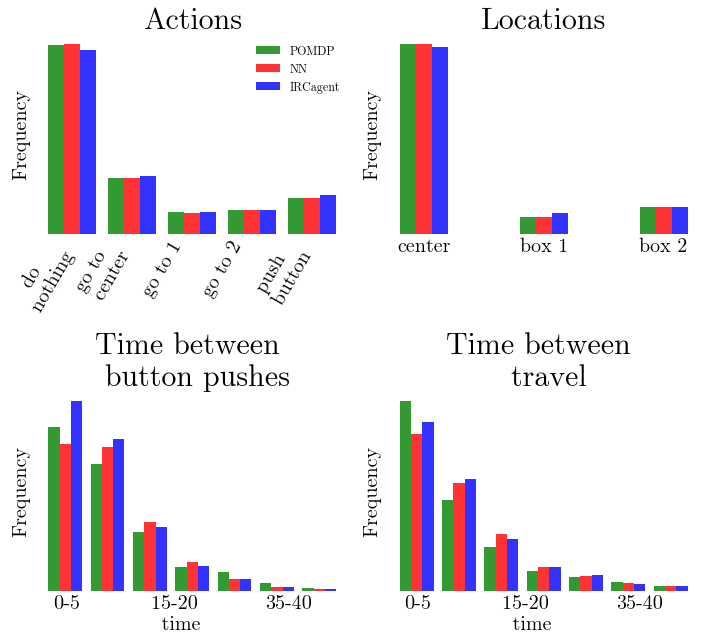

In [258]:
fig_behav, ax = plt.subplots(2, 2, figsize=(10, 9))

ax[0, 0].hist([np.squeeze(act_POMDP), np.squeeze(act), np.squeeze(act_est)], bins = [0,1,2,3,4,5], 
         color = ['green', 'red','blue'], label = ['POMDP','NN', 'IRCagent'], alpha = 0.8)
ax[0, 0].legend(fontsize = 12, frameon = False)
ax[0, 0].set_title('Actions', fontsize = 30)
labels = [item.get_text() for item in ax[0, 0].get_xticklabels()]
labels[1] = 'do \n nothing'
labels[2] = 'go to \n center'
labels[3] = 'go to 1'
labels[4] = 'go to 2'
labels[5] = 'push \n button'
ax[0, 0].set_ylabel('Frequency', fontsize = 20)
ax[0, 0].set_xticklabels(labels, rotation=60, ha = 'center', fontsize = 20)
ax[0, 0].xaxis.set_tick_params(length = 0)
ax[0, 0].set_yticks([])
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['bottom'].set_visible(False)
ax[0, 0].spines['left'].set_visible(False)


ax[0, 1].set_title('Locations', fontsize = 30)
ax[0, 1].hist([np.squeeze(loc), np.squeeze(loc), np.squeeze(loc_est)], 
         bins = 5, color = ['green', 'red','blue'], label = ['POMDP', 'NN', 'IRCagent'], alpha = 0.8)
ax[0, 1].set_xticks(np.arange(0, 2, 0.2))
labels = [item.get_text() for item in ax[0, 1].get_xticklabels()]
labels[1] = 'center'
labels[5] = 'box 1'
labels[9] = 'box 2'
ax[0, 1].set_xticklabels(labels, ha = 'center', fontsize = 20)
ax[0, 1].xaxis.set_tick_params(length = 0)
ax[0, 1].set_yticks([])
ax[0, 1].set_ylabel('Frequency', fontsize = 20)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].spines['bottom'].set_visible(False)
ax[0, 1].spines['left'].set_visible(False)


ax[1, 0].set_title('Time between \n button pushes', fontsize = 30)
ax[1, 0].hist([pbind_POMDP[1:] - pbind_POMDP[0:-1], 
               pbind[1:] - pbind[0:-1], 
               pbind_est[1:] - pbind_est[0:-1]],
        bins = np.linspace(0, 40, 8), alpha = 0.8, 
              color = ['green', 'red','blue'], label = ['POMDP', 'NN', 'IRCagent'])
ax[1, 0].set_ylabel('Frequency', fontsize = 20)
ax[1, 0].set_xticks(range(0,41, 3))
labels = [item.get_text() for item in ax[1, 0].get_xticklabels()]
labels[1] = '0-5'
labels[6] = '15-20 \n time'
labels[11] = '35-40'
ax[1, 0].set_xticklabels(labels, ha = 'center', fontsize = 20)
ax[1, 0].xaxis.set_tick_params(length = 0)
ax[1, 0].set_yticks([])
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].spines['bottom'].set_visible(False)
ax[1, 0].spines['left'].set_visible(False)


ax[1, 1].set_title('Time between \n travel', fontsize = 30)
ax[1, 1].set_ylabel('Frequency', fontsize = 20)
ax[1, 1].hist([travelind_POMDP[1:] - travelind_POMDP[0:-1], 
               travelind[1:] - travelind[0:-1], 
               travelind_est[1:] - travelind_est[0:-1]], 
         bins = np.linspace(0, 40, 8), 
         color = ['green', 'red','blue'], label = ['POMDP', 'NN', 'IRCagent'], alpha = 0.8)
ax[1, 1].set_xticks(range(0,41, 3))
labels = [item.get_text() for item in ax[1, 1].get_xticklabels()]
labels[1] = '0-5'
labels[6] = '15-20 \n time'
labels[11] = '35-40'
ax[1, 1].set_xticklabels(labels, ha = 'center', fontsize = 20)
ax[1, 1].xaxis.set_tick_params(length = 0)
ax[1, 1].set_yticks([])
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].spines['bottom'].set_visible(False)
ax[1, 1].spines['left'].set_visible(False)




plt.tight_layout()
fig_behav.savefig('behavior_state.pdf', format='pdf', bbox_inches = 'tight')



0.9999999999998981 0.9999999999998981 0.9999999999998981
0.9999999999999145 0.9999999999999145 0.9999999999999145
[array([0.4040497 , 0.31293143, 0.14588127, 0.05844455, 0.04601933,
       0.01978831, 0.00736309]), array([0.36018307, 0.35286041, 0.16933638, 0.07002288, 0.02974828,
       0.00915332, 0.00503432]), array([0.42251766, 0.33776485, 0.14167013, 0.0552555 , 0.02658912,
       0.0083091 , 0.00498546])]
0.9944776806258391 0.9944776806258391 0.9944776806258391


'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


[array([0.49486191, 0.23619139, 0.11335902, 0.05266538, 0.03676943,
       0.02360308, 0.01332691]), array([0.41355216, 0.28501787, 0.14965876, 0.06191095, 0.0401365 ,
       0.02177446, 0.01283718]), array([0.43130133, 0.28711308, 0.13313329, 0.06174984, 0.03963992,
       0.01816172, 0.01358181])]
0.9707771355171055 0.9707771355171055 0.9707771355171055


'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


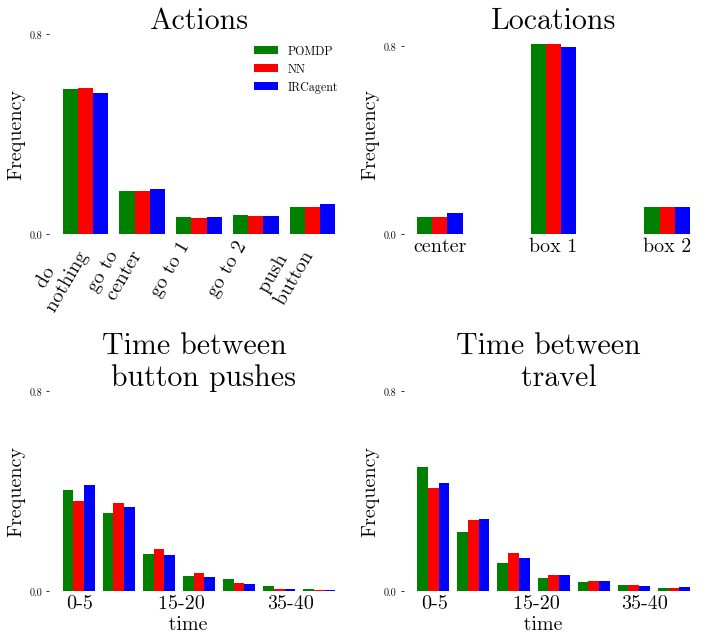

In [356]:
fig_behav, ax = plt.subplots(2, 2, figsize=(10, 9))

weights_act_POMDP = np.ones_like(np.squeeze(act_POMDP))/float(len(np.squeeze(act_POMDP)))
weights_act = np.ones_like(np.squeeze(act))/float(len(np.squeeze(act)))
weights_act_IRC = np.ones_like(np.squeeze(act_est))/float(len(np.squeeze(act_est)))


heights, bins, batch = ax[0, 0].hist([np.squeeze(act_POMDP), np.squeeze(act), np.squeeze(act_est)], 
              weights = [weights_act_POMDP, weights_act, weights_act_IRC], bins = [0,1,2,3,4,5], 
         color = ['green', 'red','blue'], label = ['POMDP','NN', 'IRCagent'])
print(np.sum(heights[0]), np.sum(heights[0]), np.sum(heights[0]))
ax[0, 0].legend(fontsize = 12, frameon = False)
ax[0, 0].set_title('Actions', fontsize = 30)
labels = [item.get_text() for item in ax[0, 0].get_xticklabels()]
labels[1] = 'do \n nothing'
labels[2] = 'go to \n center'
labels[3] = 'go to 1'
labels[4] = 'go to 2'
labels[5] = 'push \n button'
ax[0, 0].set_ylabel('Frequency', fontsize = 20)
ax[0, 0].set_xticklabels(labels, rotation=60, ha = 'center', fontsize = 20)
ax[0, 0].xaxis.set_tick_params(length = 0)
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['bottom'].set_visible(False)
ax[0, 0].spines['left'].set_visible(False)
ax[0, 0].set_yticks([0, .8])

weights_loc = np.ones_like(np.squeeze(loc))/float(len(np.squeeze(loc)))
weights_loc_IRC = np.ones_like(np.squeeze(loc_est))/float(len(np.squeeze(loc_est)))

ax[0, 1].set_title('Locations', fontsize = 30)
heights, bins, batch = ax[0, 1].hist([np.squeeze(np.abs(2*loc - 3/2)-1/2), 
                                      np.squeeze(np.abs(2*loc - 3/2)-1/2), 
                                      np.squeeze(np.abs(2*loc_est - 3/2)-1/2)],
                                     weights = [weights_loc, weights_loc, weights_loc_IRC],
         bins = 5, color = ['green', 'red','blue'], label = ['POMDP', 'NN', 'IRCagent'])
print(np.sum(heights[0]), np.sum(heights[0]), np.sum(heights[0]))
ax[0, 1].set_xticks(np.arange(0, 2, 0.2))
labels = [item.get_text() for item in ax[0, 1].get_xticklabels()]
labels[1] = 'center'
labels[5] = 'box 1'
labels[9] = 'box 2'
ax[0, 1].set_xticklabels(labels, ha = 'center', fontsize = 20)
ax[0, 1].xaxis.set_tick_params(length = 0)
ax[0, 1].set_ylabel('Frequency', fontsize = 20)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].spines['bottom'].set_visible(False)
ax[0, 1].spines['left'].set_visible(False)
ax[0, 1].set_yticks([0, .8])


weights_pbind_POMDP = np.ones_like(pbind_POMDP[1:] )/float(len(pbind_POMDP[1:] ))
weights_pbind = np.ones_like(pbind[1:])/float(len(pbind[1:] ))
weights_pbind_IRC = np.ones_like(pbind_est[1:])/float(len(pbind_est[1:]))

ax[1, 0].set_title('Time between \n button pushes', fontsize = 30)
heights, bins, batch = ax[1, 0].hist([pbind_POMDP[1:] - pbind_POMDP[0:-1], 
               pbind[1:] - pbind[0:-1], 
               pbind_est[1:] - pbind_est[0:-1]],
              weights = [weights_pbind_POMDP, weights_pbind, weights_pbind_IRC],
              bins = np.linspace(0, 40, 8),  
              color = ['green', 'red','blue'], label = ['POMDP', 'NN', 'IRCagent'])
print(heights)
print(np.sum(heights[0]), np.sum(heights[0]), np.sum(heights[0]))
ax[1, 0].set_ylabel('Frequency', fontsize = 20)
ax[1, 0].set_xticks(range(0,41, 3))
labels = [item.get_text() for item in ax[1, 0].get_xticklabels()]
labels[1] = '0-5'
labels[6] = '15-20 \n time'
labels[11] = '35-40'
ax[1, 0].set_xticklabels(labels, ha = 'center', fontsize = 20)
ax[1, 0].xaxis.set_tick_params(length = 0)
ax[1, 0].set_yticks([])
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].spines['bottom'].set_visible(False)
ax[1, 0].spines['left'].set_visible(False)
ax[1, 0].set_yticks([0, .8])

#
ax[1, 1].set_title('Time between \n travel', fontsize = 30)
ax[1, 1].set_ylabel('Frequency', fontsize = 20)
heights, xbins, ptchs = ax[1, 1].hist([travelind_POMDP[1:] - travelind_POMDP[0:-1], 
               travelind[1:] - travelind[0:-1], 
               travelind_est[1:] - travelind_est[0:-1]], 
              weights = [weights_travelind_POMDP, weights_travelind, weights_travelind_IRC], 
              bins = np.linspace(0, 40, 8), 
              color = ['green', 'red','blue'], label = ['POMDP', 'NN', 'IRCagent'])
print(heights)
print(np.sum(heights[0]), np.sum(heights[0]), np.sum(heights[0]))

ax[1, 1].set_xticks(range(0,41, 3))
labels = [item.get_text() for item in ax[1, 0].get_xticklabels()]
labels[1] = '0-5'
labels[6] = '15-20 \n time'
labels[11] = '35-40'


ax[1, 1].set_xticklabels(labels, ha = 'center', fontsize = 20)
ax[1, 1].xaxis.set_tick_params(length = 0)
ax[1, 1].set_yticks([0, .8])
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].spines['bottom'].set_visible(False)
ax[1, 1].spines['left'].set_visible(False)




plt.tight_layout()
fig_behav.savefig('behavior_state.pdf', format='pdf', bbox_inches = 'tight')

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


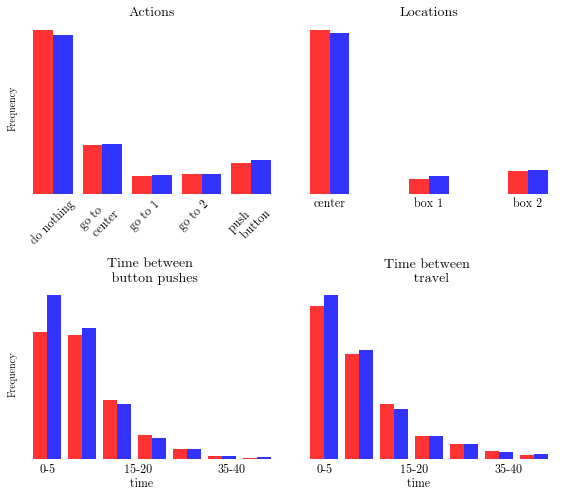

In [86]:
fig_behav, ax = plt.subplots(2, 2, figsize=(8, 7))

ax[0, 0].hist([np.squeeze(act), np.squeeze(act_est)], bins = [0,1,2,3,4,5], 
         color = ['red','blue'], label = ['true', 'estimated'], alpha = 0.8)
#ax[0, 0].legend(fontsize = 12, frameon = False)
ax[0, 0].set_title('Actions', fontsize = 14)
labels = [item.get_text() for item in ax[0, 0].get_xticklabels()]
labels[1] = 'do nothing'
labels[2] = 'go to \n center'
labels[3] = 'go to 1'
labels[4] = 'go to 2'
labels[5] = 'push \n button'
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].set_xticklabels(labels, rotation=45, ha = 'left', fontsize = 12)
ax[0, 0].xaxis.set_tick_params(length = 0)
ax[0, 0].set_yticks([])
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['bottom'].set_visible(False)
ax[0, 0].spines['left'].set_visible(False)


ax[0, 1].set_title('Locations', fontsize = 14)
ax[0, 1].hist([np.squeeze(loc), np.squeeze(loc_est)], 
         bins = 5, color = ['red','blue'], label = ['true', 'estimated'], alpha = 0.8)
ax[0, 1].set_xticks(np.arange(0, 2, 0.2))
labels = [item.get_text() for item in ax[0, 1].get_xticklabels()]
labels[1] = 'center'
labels[5] = 'box 1'
labels[9] = 'box 2'
ax[0, 1].set_xticklabels(labels, ha = 'center', fontsize = 12)
ax[0, 1].xaxis.set_tick_params(length = 0)
ax[0, 1].set_yticks([])
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].spines['bottom'].set_visible(False)
ax[0, 1].spines['left'].set_visible(False)


ax[1, 0].set_title('Time between \n button pushes', fontsize = 14)
weights = np.ones_like(myarray)/float(len(myarray))
plt.hist(myarray, weights=weights)
ax[1, 0].hist([pbind[1:] - pbind[0:-1], pbind_est[1:] - pbind_est[0:-1]],
        bins = np.linspace(0, 40, 8), alpha = 0.8, color = ['red','blue'], label = ['true', 'estimated'])
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].set_xticks(range(0,41, 3))
labels = [item.get_text() for item in ax[1, 0].get_xticklabels()]
labels[1] = '0-5'
labels[6] = '15-20 \n time'
labels[11] = '35-40'
ax[1, 0].set_xticklabels(labels, ha = 'center', fontsize = 12)
ax[1, 0].xaxis.set_tick_params(length = 0)
ax[1, 0].set_yticks([])
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].spines['bottom'].set_visible(False)
ax[1, 0].spines['left'].set_visible(False)


ax[1, 1].set_title('Time between \n travel', fontsize = 14)
ax[1, 1].hist([travelind[1:] - travelind[0:-1], travelind_est[1:] - travelind_est[0:-1]], 
         bins = np.linspace(0, 40, 8), 
         color = ['red','blue'], label = ['true', 'estimated'], alpha = 0.8)
ax[1, 1].set_xticks(range(0,41, 3))
labels = [item.get_text() for item in ax[1, 1].get_xticklabels()]
labels[1] = '0-5'
labels[6] = '15-20 \n time'
labels[11] = '35-40'
ax[1, 1].set_xticklabels(labels, ha = 'center', fontsize = 12)
ax[1, 1].xaxis.set_tick_params(length = 0)
ax[1, 1].set_yticks([])
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].spines['bottom'].set_visible(False)
ax[1, 1].spines['left'].set_visible(False)




plt.tight_layout()
# fig_behav.savefig('behavior_state.pdf', format='pdf', bbox_inches = 'tight')
